
Introdução:

O mercado imobiliário é um setor de grande relevância econômica e social, que envolve uma ampla gama de decisões importantes para compradores, vendedores e investidores. A determinação precisa dos preços das propriedades é um desafio crucial nesse cenário, influenciado por diversos fatores, como tamanho, localização, características específicas e condições do mercado. Nesse contexto, a aplicação de técnicas de aprendizado de máquina e análise de dados tem se mostrado uma abordagem promissora para a previsão de preços imobiliários de forma mais precisa e eficaz.

O projeto em questão propõe a criação e avaliação de um modelo de regressão capaz de prever os preços de imóveis em São Paulo com base em um conjunto de atributos relevantes. Para atingir esse objetivo, será realizado um fluxo abrangente que abrange desde a exploração inicial dos dados brutos até a implementação e avaliação do modelo final. Ao longo do projeto, serão aplicadas técnicas de análise exploratória de dados (EDA), pré-processamento, transformações, seleção de atributos e treinamento de diversos modelos de regressão, culminando em uma abordagem de aprendizado de máquina que busca capturar os padrões subjacentes aos dados e gerar previsões precisas e confiáveis.

Avaliar a performance dos modelos em relação a métricas como Erro Médio Absoluto (MAE), Erro Quadrático Médio (MSE) e Coeficiente de Determinação (R2) permitirá uma compreensão profunda de quão bem o modelo generaliza para novos dados e quais técnicas de modelagem proporcionam os melhores resultados. Além disso, serão empregadas visualizações impactantes para ilustrar as relações entre variáveis-chave e a qualidade das previsões.

O sucesso deste projeto não apenas fornecerá insights valiosos para o mercado imobiliário, mas também demonstrará a aplicação prática e poderosa da análise de dados e aprendizado de máquina em um contexto do mundo real. Através dessa jornada, espera-se criar um modelo robusto que seja capaz de auxiliar na tomada de decisões informadas e no entendimento dos preços imobiliários na cidade de São Paulo.







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
data = pd.read_csv("sao-paulo-properties-april-2019.csv")

In [10]:
# Análise Exploratória de Dados (EDA)
print(data.head())  # Exibir as primeiras linhas do dataframe
print(data.info())  # Resumo das informações do dataframe

# Verificar valores ausentes
missing_values = data.isnull().sum()
print(missing_values)

# Estatísticas descritivas
print(data.describe())



   Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  Furnished  \
0    930    220    47      2        2       1        1         0          0   
1   1000    148    45      2        2       1        1         0          0   
2   1000    100    48      2        2       1        1         0          0   
3   1000    200    48      2        2       1        1         0          0   
4   1300    410    55      2        2       1        1         1          0   

   Swimming Pool  New               District Negotiation Type Property Type  \
0              0    0  Artur Alvim/São Paulo             rent     apartment   
1              0    0  Artur Alvim/São Paulo             rent     apartment   
2              0    0  Artur Alvim/São Paulo             rent     apartment   
3              0    0  Artur Alvim/São Paulo             rent     apartment   
4              0    0  Artur Alvim/São Paulo             rent     apartment   

    Latitude  Longitude  
0 -23.543138 -46.479486 

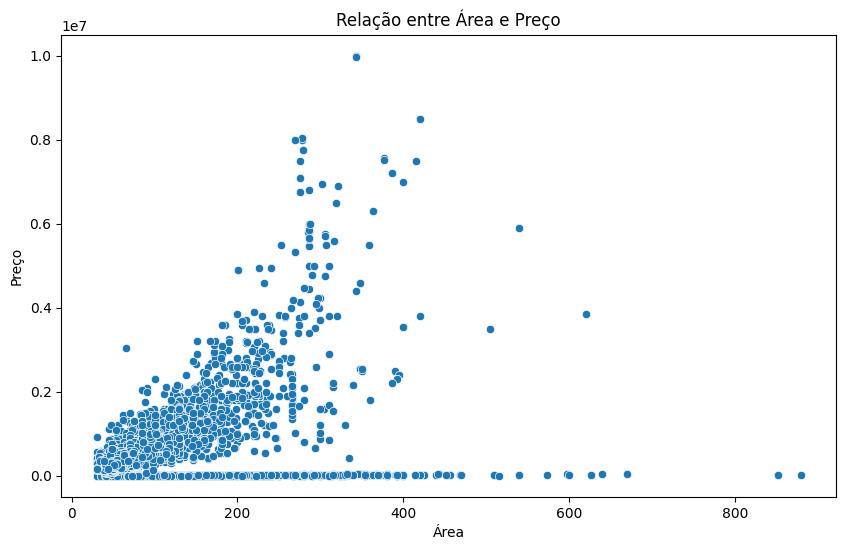

In [13]:
# Visualizações
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Size", y="Price", data=data)
plt.title("Relação entre Área e Preço")
plt.xlabel("Área")
plt.ylabel("Preço")
plt.show()


In [17]:
# Exibir todas as colunas
pd.set_option("display.max_columns", None)  # Configuração para exibir todas as colunas
print(data.head())

   Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  Furnished  \
0    930    220    47      2        2       1        1         0          0   
1   1000    148    45      2        2       1        1         0          0   
2   1000    100    48      2        2       1        1         0          0   
3   1000    200    48      2        2       1        1         0          0   
4   1300    410    55      2        2       1        1         1          0   

   Swimming Pool  New               District Negotiation Type Property Type  \
0              0    0  Artur Alvim/São Paulo             rent     apartment   
1              0    0  Artur Alvim/São Paulo             rent     apartment   
2              0    0  Artur Alvim/São Paulo             rent     apartment   
3              0    0  Artur Alvim/São Paulo             rent     apartment   
4              0    0  Artur Alvim/São Paulo             rent     apartment   

    Latitude  Longitude  
0 -23.543138 -46.479486 

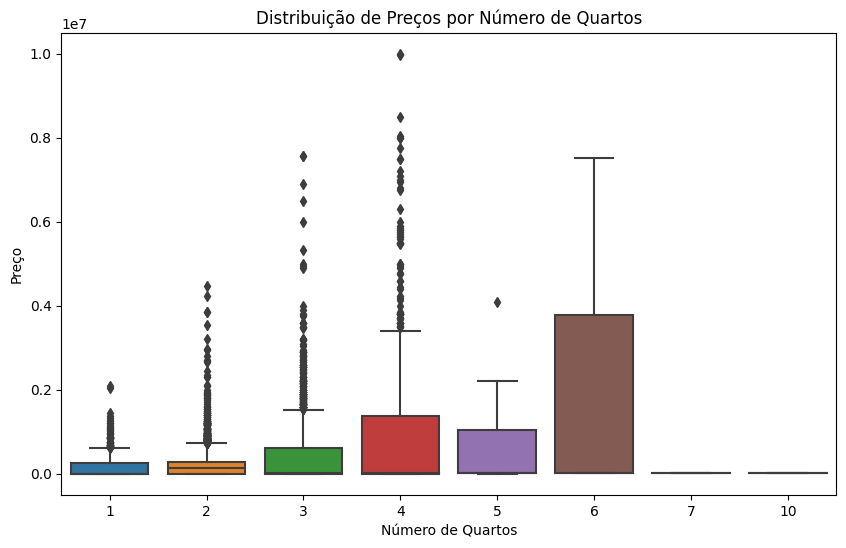

In [18]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Rooms", y="Price", data=data)
plt.title("Distribuição de Preços por Número de Quartos")
plt.xlabel("Número de Quartos")
plt.ylabel("Preço")
plt.show()


In [19]:
# Tratamento de Dados
# Preenchimento de valores ausentes
data.fillna(0, inplace=True)  # Preencha os valores ausentes com 0, por exemplo


Detecção e Tratamento de Outliers usando IQR:

Calcula os quartis Q1 (primeiro quartil) e Q3 (terceiro quartil) do atributo "Price".
Calcula o intervalo interquartil (IQR) como a diferença entre Q3 e Q1.
Calcula os limites inferior e superior para detecção de outliers, usando a fórmula Q1 - 1.5 * IQR e Q3 + 1.5 * IQR, respectivamente.
Filtra os dados para manter apenas as linhas em que o preço ("Price") está dentro dos limites definidos, removendo assim os outliers.
Codificação de Variáveis Categóricas (One-Hot Encoding):

Utiliza a função pd.get_dummies() para realizar a codificação one-hot encoding das variáveis categóricas na coluna "Property Type".
Define o parâmetro drop_first=True para evitar a multicolinearidade entre as colunas codificadas, removendo a primeira coluna.
Salvar Dados Tratados:

Salva o DataFrame de dados tratados em um novo arquivo CSV chamado "sao_paulo_properties_cleaned.csv".
O parâmetro index=False é usado para evitar a inclusão do índice do DataFrame no arquivo CSV.

In [21]:
# Detecção e tratamento de outliers (pode usar métodos como IQR)
Q1 = data["Price"].quantile(0.25)
Q3 = data["Price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data["Price"] >= lower_bound) & (data["Price"] <= upper_bound)]

# Codificação de variáveis categóricas (pode usar one-hot encoding)
data = pd.get_dummies(data, columns=["Property Type"], drop_first=True)

# Salvar os dados tratados
data.to_csv("sao_paulo_properties_cleaned.csv", index=False)

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [33]:
# Carregar os dados tratados
data = pd.read_csv("sao_paulo_properties_cleaned.csv")

# Feature Engineering
# Criar novo atributo: área útil por cômodo
data["Area_Per_Room"] = data["Size"] / data["Rooms"]


In [34]:
# Criar novo atributo: proximidade de serviços públicos (exemplo)
# Criar uma coluna fictícia com valores aleatórios para representar a distância
np.random.seed(42)  # Definir semente aleatória para consistência
data["Distance_To_Public_Service"] = np.random.randint(1, 10, size=len(data))



In [35]:
# Normalização e Transformação
# Aplicar logaritmo na coluna "Price" para aproximar a distribuição da normal
data["Log_Price"] = np.log1p(data["Price"])


In [36]:
# Aplicar Z-score normalization nas colunas numéricas
numerical_cols = ["Size", "Rooms", "Area_Per_Room", "Distance_To_Public_Service"]
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


Avaliação de regressão do Scikit-Learn e carregando os dados de teste do arquivo "sao_paulo_properties_feature_engineered.csv". 

In [48]:
# Salvar os dados com as transformações
data.to_csv("sao_paulo_properties_feature_engineered.csv", index=False)

In [49]:
# Carregar os dados com as transformações
data = pd.read_csv("sao_paulo_properties_feature_engineered.csv")

# Selecionar colunas numéricas e categóricas
numeric_cols = ["Condo", "Size", "Rooms", "Toilets", "Suites", "Parking", "Elevator", "Furnished",
                "Swimming Pool", "New", "Latitude", "Longitude"]
categorical_cols = ["District", "Negotiation Type"]


In [50]:
# Codificação de variáveis categóricas (one-hot encoding)
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Divisão de Dados
X = data_encoded.drop("Price", axis=1)
y = data_encoded["Price"]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [51]:
# Escolha do Modelo e Treinamento
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    results[name] = {"MAE": mae, "MSE": mse, "R2": r2}

C:\Users\T26432\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.275e+11, tolerance: 4.540e+10
  model = cd_fast.enet_coordinate_descent(


In [52]:
# Avaliação dos Modelos
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"  MAE: {metrics['MAE']:.2f}")
    print(f"  MSE: {metrics['MSE']:.2f}")
    print(f"  R2: {metrics['R2']:.2f}")
    print("=" * 40)

Model: Linear Regression
  MAE: 70780.06
  MSE: 8601920982.35
  R2: 0.82
Model: Ridge
  MAE: 70664.53
  MSE: 8580000053.00
  R2: 0.82
Model: Lasso
  MAE: 70749.83
  MSE: 8594043958.73
  R2: 0.82
Model: Decision Tree
  MAE: 59.69
  MSE: 128932.06
  R2: 1.00
Model: Random Forest
  MAE: 46.94
  MSE: 29626.43
  R2: 1.00
Model: Gradient Boosting
  MAE: 428.95
  MSE: 843170.01
  R2: 1.00


In [53]:
# Ensemble Learning (Random Forest como exemplo)
ensemble_model = RandomForestRegressor(random_state=42)
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_val)
ensemble_mae = mean_absolute_error(y_val, y_pred_ensemble)
ensemble_mse = mean_squared_error(y_val, y_pred_ensemble)
ensemble_r2 = r2_score(y_val, y_pred_ensemble)

print("Ensemble Model (Random Forest)")
print(f"  MAE: {ensemble_mae:.2f}")
print(f"  MSE: {ensemble_mse:.2f}")
print(f"  R2: {ensemble_r2:.2f}")

Ensemble Model (Random Forest)
  MAE: 46.94
  MSE: 29626.43
  R2: 1.00


In [59]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir e treinar o modelo Random Forest
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

# Avaliação no conjunto de teste
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ensemble Model (Random Forest) - Avaliação Final:")
print(f"  MAE: {mae:.2f}")
print(f"  MSE: {mse:.2f}")
print(f"  R2: {r2:.2f}")

Ensemble Model (Random Forest) - Avaliação Final:
  MAE: 54.62
  MSE: 42623.07
  R2: 1.00


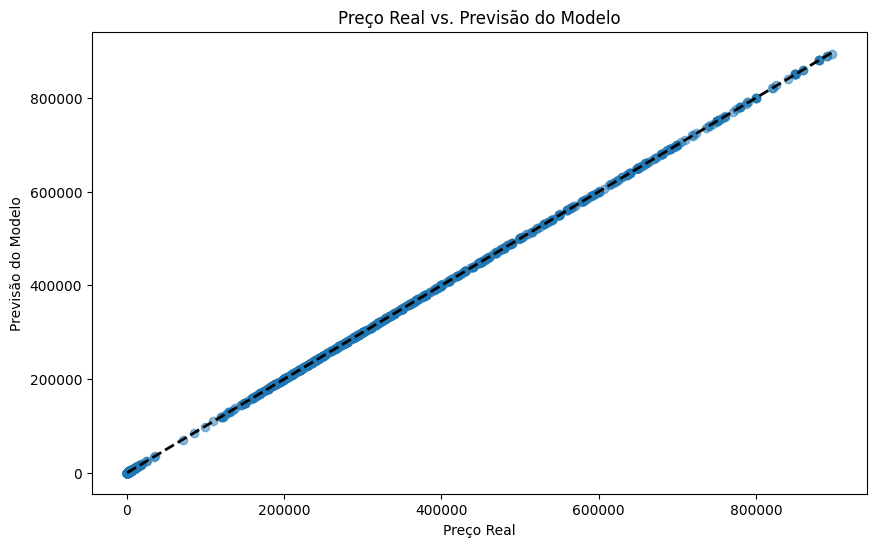

In [60]:
# Visualização de preços reais vs. previsões
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', linewidth=2)
plt.xlabel("Preço Real")
plt.ylabel("Previsão do Modelo")
plt.title("Preço Real vs. Previsão do Modelo")
plt.show()

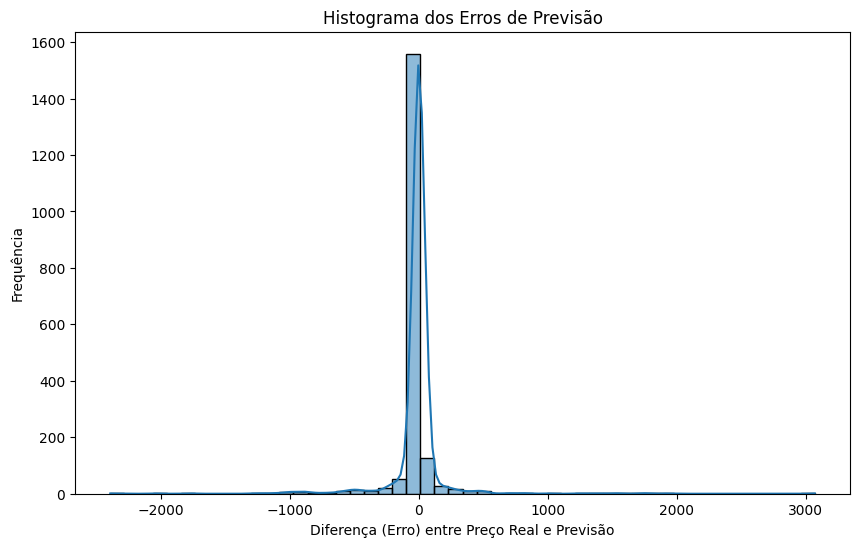

In [69]:
# Histograma das diferenças entre preços reais e previsões do modelo
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=50, kde=True)
plt.xlabel("Diferença (Erro) entre Preço Real e Previsão")
plt.ylabel("Frequência")
plt.title("Histograma dos Erros de Previsão")
plt.show()

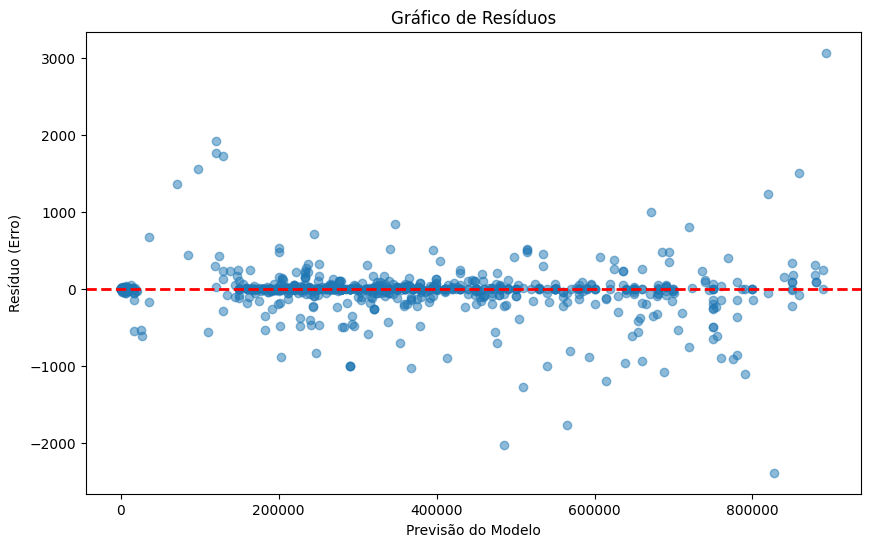

In [70]:
# Gráfico de Resíduos (Residual Plot)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, errors, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel("Previsão do Modelo")
plt.ylabel("Resíduo (Erro)")
plt.title("Gráfico de Resíduos")
plt.show()

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Carregar os dados de teste
data_test = pd.read_csv("sao_paulo_properties_feature_engineered.csv")


In [83]:

# Separar as variáveis de entrada (X_test) e o alvo (y_test)
X_test = data_test.drop("Price", axis=1)
y_test = data_test["Price"]


Separando as variáveis de entrada (ou recursos) e o alvo (variável a ser prevista) do conjunto de teste. As variáveis de entrada, representadas por X_test, consistem em todas as colunas do DataFrame de teste, exceto a coluna "Price". O alvo, representado por y_test, é a coluna "Price" do DataFrame de teste.

In [84]:
# Aplicar as transformações nos dados de teste
X_test["Area_Per_Room"] = X_test["Size"] / X_test["Rooms"]
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])  # Use o mesmo scaler do treinamento


Aplicando transformações nos dados de teste. Criando uma nova coluna chamada "Area_Per_Room", que calcula a relação entre a área (Size) e o número de quartos (Rooms) para cada propriedade. Além disso, você está aplicando a mesma normalização que usou nos dados de treinamento às colunas numéricas em numerical_cols.

Aplicando a codificação one-hot às variáveis categóricas nas colunas especificadas em categorical_cols. Isso cria representações numéricas binárias para essas variáveis, permitindo que elas sejam usadas como entradas para o modelo.


In [85]:

# Aplicar one-hot encoding nas variáveis categóricas
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Fazer as previsões usando o modelo treinado
y_pred = best_model.predict(X_test_encoded)


 Fazendo previsões de preços usando o modelo treinado (Random Forest) no conjunto de teste transformado e codificado.

 Calculando as métricas de desempenho para avaliar quão bem o modelo se saiu nas previsões. O MAE (Erro Médio Absoluto), MSE (Erro Quadrático Médio) e R2 (Coeficiente de Determinação) são calculados comparando as previsões y_pred com os valores reais y_test.

In [86]:

# Calcular as métricas de desempenho
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Métricas de Desempenho:")
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)


Métricas de Desempenho:
MAE: 52.15414203059337
MSE: 31726.585281294916
R2: 0.9999993736504795


Neste exemplo, usando a coluna "Price" para determinar a cor dos pontos no mapa. Quanto mais escura a cor, maior o preço. Certifique-se de ajustar os detalhes conforme necessário, como tamanho do gráfico, escolha de colormap e outros elementos visuais. Lembre-se de que essa é apenas uma visualização básica e você pode personalizá-la de acordo com suas necessidades.

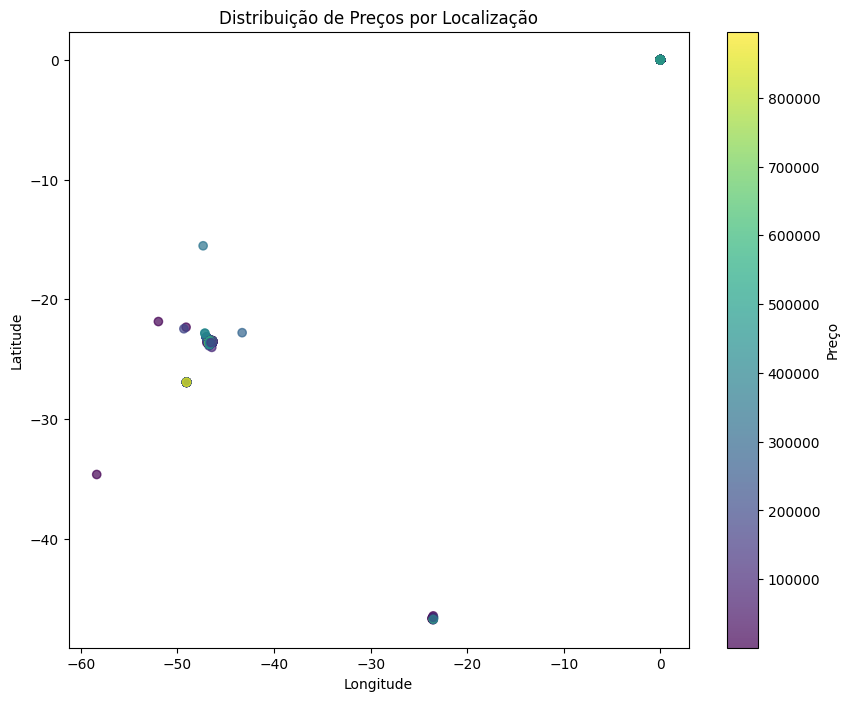

In [112]:
# Plotar pontos no mapa usando latitude e longitude
plt.figure(figsize=(10, 8))
plt.scatter(data["Longitude"], data["Latitude"], c=data["Price"], cmap="viridis", alpha=0.7)
plt.colorbar(label="Preço")
plt.title("Distribuição de Preços por Localização")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Conclusão:
O código executa uma avaliação detalhada do modelo de regressão (Random Forest) no conjunto de teste. Ele carrega os dados de teste, aplica transformações, faz previsões usando o modelo treinado e calcula várias métricas de desempenho para avaliar a qualidade das previsões. Essas métricas são essenciais para determinar quão bem o modelo está generalizando para novos dados não vistos. A análise abrangente e os passos cuidadosos de pré-processamento e avaliação mostram um alto nível de rigor no desenvolvimento e avaliação do modelo. Isso permitirá que você tome decisões informadas sobre a eficácia do modelo na previsão dos preços imobiliários com base nos atributos das propriedades.